<a href="https://colab.research.google.com/github/hyuna0926/cp2_phase2/blob/main/2%EC%9B%94%201%EC%9D%BC/fashion_campus_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 합치기
- transaction_new, customer 합치기

- transaction_new

In [ ]:
transaction=pd.read_csv('/content/drive/MyDrive/fashon campus/transaction_new.csv')

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              481139 non-null   object 
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  total_amount            1254585 non-null  int64  
 13  product_id              1254585 non-null  int64  
 14  qu

In [ ]:
transaction.head()

- customer

In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/fashon campus/customer.csv')

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [ ]:
customer.head(5)

In [ ]:
len(customer['home_location'].unique())

33

- 데이터 합치기
  - customer_id 기준으로 transaction에 customer붙이기

In [ ]:
trans_customer = pd.merge(transaction,customer, on='customer_id')

- 필요없는 데이터 삭제

In [ ]:
drop_columns = ['first_name', 'last_name', 'username', 'email', 'home_location_long',
              'device_id', 'shipment_date_limit', 'promo_code', 'home_location_lat'
                  ,'shipment_date_limit','shipment_location_lat',
                     'shipment_location_long', 'device_id','device_version']
trans_customer_drop = trans_customer.drop(drop_columns, axis=1, inplace=False)

In [ ]:
# trans_customer_drop.to_csv('trans_customer.csv')

- product

In [ ]:
product = pd.read_csv('/content/drive/MyDrive/fashon campus/product.csv', on_bad_lines='skip')

In [ ]:
product.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
product.rename(columns={'id':'product_id'},inplace=True)

In [ ]:
trans_cus_pro=pd.merge(trans_customer_drop,product,on='product_id',how='outer')

In [ ]:
trans_cus_pro.head().T

,0,1,2,3,4
created_at,2018-07-29T15:22:01.458193Z,2021-01-15T19:52:40.793729Z,2020-06-04T14:54:13.726119Z,2019-02-05T08:29:50.613535Z,2020-11-04T14:20:44.351064Z
customer_id,5868,82831,47013,17135,70185
booking_id,186e2bee-0637-4710-8981-50c2d737bc42,81f60282-96c5-45f5-8a24-18e8111ccd08,a144e124-1ad6-425b-9f64-b01f05c697ff,e620a19d-982d-4fc2-9715-29fda7f42269,bbe1053a-9738-4438-bea4-0a3abcaf6afb
session_id,3abaa6ce-e320-4e51-9469-d9f3fa328e86,c7d4a5a2-362b-4042-a971-a55f84e0619f,141a3f3b-360e-4489-bc10-91528e9e1139,aadf43f6-59be-4b2f-9338-ccec0b2abf40,ae213ea2-c5bb-45aa-8a27-820d33c873aa
payment_method,Debit Card,OVO,Gopay,Credit Card,Gopay
payment_status,Success,Success,Success,Success,Success
promo_amount,1415,0,0,0,0
shipment_fee,10000,10000,10000,0,10000
total_amount,199832,232512,255159,263371,2413496
product_id,54728,54728,54728,54728,54728


In [ ]:
trans_cus_pro.drop(['productDisplayName'],axis=1,inplace=True)

In [ ]:
trans_cus_pro.to_csv('trans_cus_pro.csv')

In [ ]:
trans_cus_pro.head().T

,0,1,2,3,4
created_at,2018-07-29T15:22:01.458193Z,2021-01-15T19:52:40.793729Z,2020-06-04T14:54:13.726119Z,2019-02-05T08:29:50.613535Z,2020-11-04T14:20:44.351064Z
customer_id,5868,82831,47013,17135,70185
booking_id,186e2bee-0637-4710-8981-50c2d737bc42,81f60282-96c5-45f5-8a24-18e8111ccd08,a144e124-1ad6-425b-9f64-b01f05c697ff,e620a19d-982d-4fc2-9715-29fda7f42269,bbe1053a-9738-4438-bea4-0a3abcaf6afb
session_id,3abaa6ce-e320-4e51-9469-d9f3fa328e86,c7d4a5a2-362b-4042-a971-a55f84e0619f,141a3f3b-360e-4489-bc10-91528e9e1139,aadf43f6-59be-4b2f-9338-ccec0b2abf40,ae213ea2-c5bb-45aa-8a27-820d33c873aa
payment_method,Debit Card,OVO,Gopay,Credit Card,Gopay
payment_status,Success,Success,Success,Success,Success
promo_amount,1415,0,0,0,0
shipment_fee,10000,10000,10000,0,10000
total_amount,199832,232512,255159,263371,2413496
product_id,54728,54728,54728,54728,54728


In [ ]:
trans_cus_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 26 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   created_at       1254585 non-null  object 
 1   customer_id      1254585 non-null  int64  
 2   booking_id       1254585 non-null  object 
 3   session_id       1254585 non-null  object 
 4   payment_method   1254585 non-null  object 
 5   payment_status   1254585 non-null  object 
 6   promo_amount     1254585 non-null  int64  
 7   shipment_fee     1254585 non-null  int64  
 8   total_amount     1254585 non-null  int64  
 9   product_id       1254585 non-null  int64  
 10  quantity         1254585 non-null  int64  
 11  item_price       1254585 non-null  int64  
 12  gender_x         1254585 non-null  object 
 13  birthdate        1254585 non-null  object 
 14  device_type      1254585 non-null  object 
 15  home_location    1254585 non-null  object 
 16  home_country     1

- created_at 구입날짜
- birth 생일
- first_join 가입날짜

  를 월까지만!

In [ ]:
a = trans_cus_pro['created_at'].apply(lambda x: x[0:7])

In [ ]:
trans_cus_pro['created_at']=a

In [ ]:
birth= trans_cus_pro['birthdate'].apply(lambda x: x[0:7])
join = trans_cus_pro['first_join_date'].apply(lambda x: x[0:7])

In [ ]:
trans_cus_pro['birthdate']=birth
trans_cus_pro['first_join_date']=join

In [ ]:
trans_cus_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 26 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   created_at       1254585 non-null  object 
 1   customer_id      1254585 non-null  int64  
 2   booking_id       1254585 non-null  object 
 3   session_id       1254585 non-null  object 
 4   payment_method   1254585 non-null  object 
 5   payment_status   1254585 non-null  object 
 6   promo_amount     1254585 non-null  int64  
 7   shipment_fee     1254585 non-null  int64  
 8   total_amount     1254585 non-null  int64  
 9   product_id       1254585 non-null  int64  
 10  quantity         1254585 non-null  int64  
 11  item_price       1254585 non-null  int64  
 12  gender_x         1254585 non-null  object 
 13  birthdate        1254585 non-null  object 
 14  device_type      1254585 non-null  object 
 15  home_location    1254585 non-null  object 
 16  home_country     1

### 데이터 경량화

In [ ]:
num_cols = [col for col in trans_cus_pro.columns if trans_cus_pro[col].dtype!='object']
cat_cols = [col for col in trans_cus_pro.columns if col not in num_cols]

In [ ]:
trans_cus_pro[cat_cols] = trans_cus_pro[cat_cols].astype('category')

In [ ]:
trans_cus_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 26 columns):
 #   Column           Non-Null Count    Dtype   
---  ------           --------------    -----   
 0   created_at       1254585 non-null  category
 1   customer_id      1254585 non-null  int64   
 2   booking_id       1254585 non-null  category
 3   session_id       1254585 non-null  category
 4   payment_method   1254585 non-null  category
 5   payment_status   1254585 non-null  category
 6   promo_amount     1254585 non-null  int64   
 7   shipment_fee     1254585 non-null  int64   
 8   total_amount     1254585 non-null  int64   
 9   product_id       1254585 non-null  int64   
 10  quantity         1254585 non-null  int64   
 11  item_price       1254585 non-null  int64   
 12  gender_x         1254585 non-null  category
 13  birthdate        1254585 non-null  category
 14  device_type      1254585 non-null  category
 15  home_location    1254585 non-null  category
 16  

In [ ]:
trans_cus_pro.describe()

,customer_id,promo_amount,shipment_fee,total_amount,product_id,quantity,item_price,year
count,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.253938e+06
mean,4.980987e+04,2.046875e+03,9.190860e+03,1.181574e+06,2.970114e+04,1.475128e+00,2.499744e+05,2.012808e+03
std,2.900057e+04,3.068618e+03,9.371999e+03,1.728940e+06,1.705351e+04,1.590220e+00,1.118733e+05,2.127268e+00
min,3.000000e+00,0.000000e+00,0.000000e+00,1.089800e+04,1.163000e+03,1.000000e+00,5.600000e+03,2.007000e+03
25%,2.447800e+04,0.000000e+00,0.000000e+00,2.466450e+05,1.477600e+04,1.000000e+00,1.683730e+05,2.011000e+03
50%,4.957700e+04,0.000000e+00,1.000000e+04,4.558770e+05,2.861400e+04,1.000000e+00,2.335400e+05,2.012000e+03
75%,7.494800e+04,3.998000e+03,1.000000e+04,1.360496e+06,4.469500e+04,1.000000e+00,3.136470e+05,2.015000e+03
max,9.999900e+04,2.451900e+04,5.000000e+04,2.350449e+07,6.000000e+04,4.800000e+01,1.200357e+06,2.019000e+03


In [ ]:
trans_cus_pro['year']=trans_cus_pro['year'].fillna(0)

In [ ]:
trans_cus_pro[num_cols] = trans_cus_pro[num_cols].astype('int32')


In [ ]:
trans_cus_pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 26 columns):
 #   Column           Non-Null Count    Dtype   
---  ------           --------------    -----   
 0   created_at       1254585 non-null  category
 1   customer_id      1254585 non-null  int32   
 2   booking_id       1254585 non-null  category
 3   session_id       1254585 non-null  category
 4   payment_method   1254585 non-null  category
 5   payment_status   1254585 non-null  category
 6   promo_amount     1254585 non-null  int32   
 7   shipment_fee     1254585 non-null  int32   
 8   total_amount     1254585 non-null  int32   
 9   product_id       1254585 non-null  int32   
 10  quantity         1254585 non-null  int32   
 11  item_price       1254585 non-null  int32   
 12  gender_x         1254585 non-null  category
 13  birthdate        1254585 non-null  category
 14  device_type      1254585 non-null  category
 15  home_location    1254585 non-null  category
 16  

## EDA

In [ ]:
sns.set_palette('Set3')

In [ ]:
trans_cus_pro.head(5).T

,0,1,2,3,4
created_at,2018-07,2021-01,2020-06,2019-02,2020-11
customer_id,5868,82831,47013,17135,70185
booking_id,186e2bee-0637-4710-8981-50c2d737bc42,81f60282-96c5-45f5-8a24-18e8111ccd08,a144e124-1ad6-425b-9f64-b01f05c697ff,e620a19d-982d-4fc2-9715-29fda7f42269,bbe1053a-9738-4438-bea4-0a3abcaf6afb
session_id,3abaa6ce-e320-4e51-9469-d9f3fa328e86,c7d4a5a2-362b-4042-a971-a55f84e0619f,141a3f3b-360e-4489-bc10-91528e9e1139,aadf43f6-59be-4b2f-9338-ccec0b2abf40,ae213ea2-c5bb-45aa-8a27-820d33c873aa
payment_method,Debit Card,OVO,Gopay,Credit Card,Gopay
payment_status,Success,Success,Success,Success,Success
promo_amount,1415,0,0,0,0
shipment_fee,10000,10000,10000,0,10000
total_amount,199832,232512,255159,263371,2413496
product_id,54728,54728,54728,54728,54728


In [ ]:
df = trans_cus_pro.copy()

- 계절별 판매수

Text(0.5, 1.0, '<season sales>')

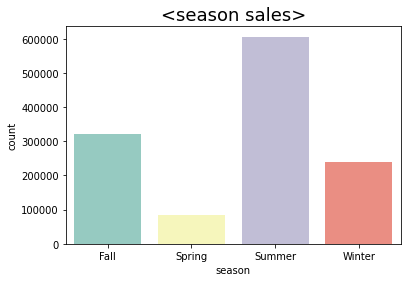

In [ ]:
sns.countplot(x='season',data=df)
plt.title('<season sales>',size=18)

- 판매날짜

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]), <a list of 74 Text major ticklabel objects>)

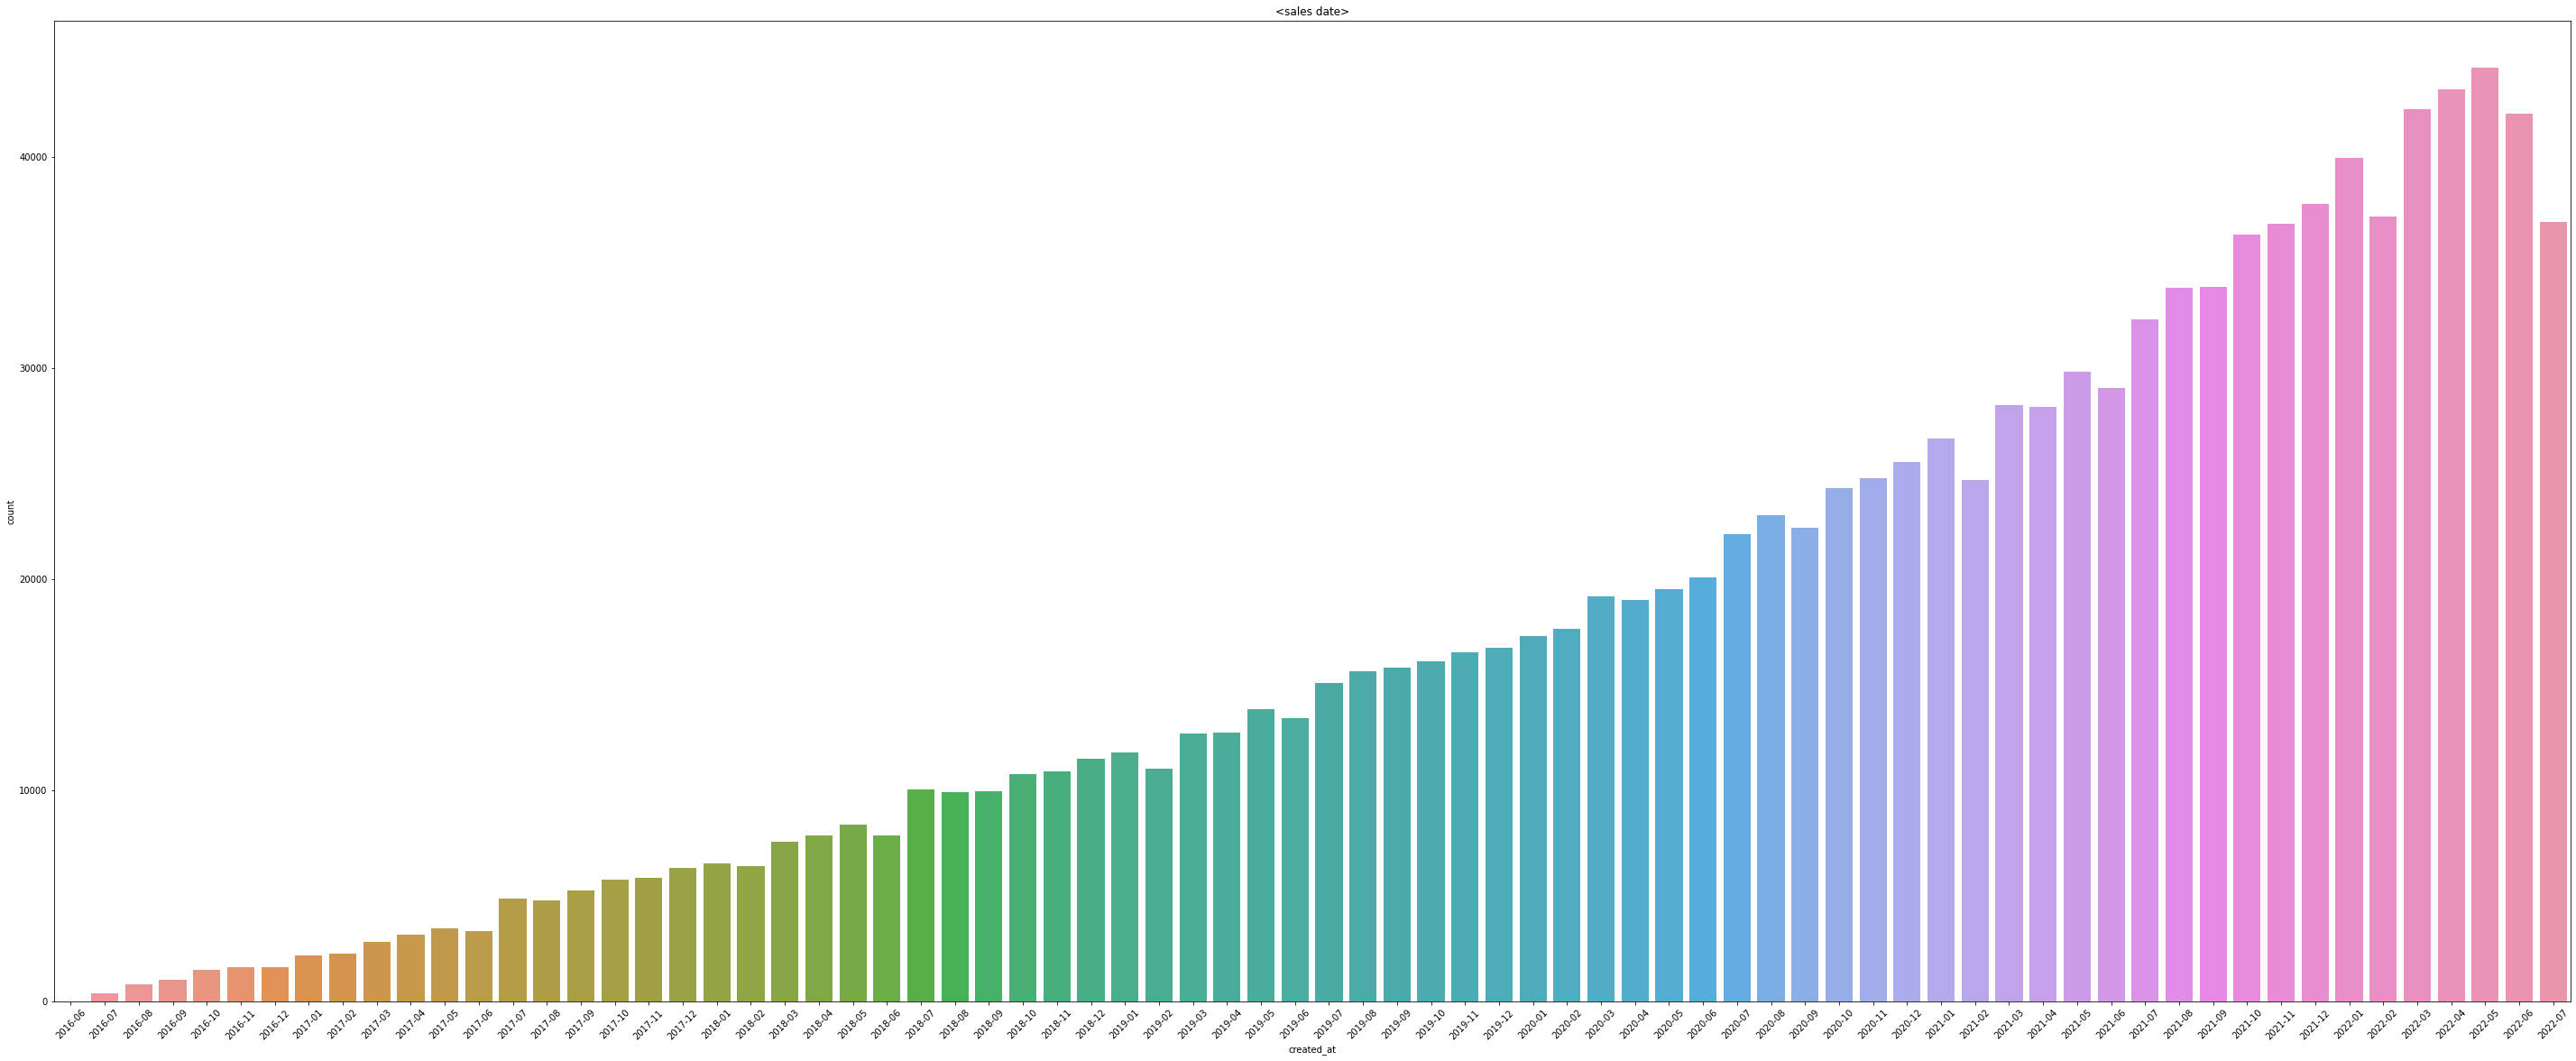

In [ ]:
plt.figure(figsize=(50,20))
sns.countplot(x='created_at',data=df)
plt.title('<sales date>')
plt.xticks(rotation=45)

- home_location 위치

In [ ]:
a = df.groupby(['home_location'])['created_at'].count().to_frame().sort_values(by='created_at')
# a = pd.DataFrame(a)
# a.reset_index(inplace=True)
# a= a.T
# a
a

,created_at
home_location,
Riau,1867
Sulawesi Tenggara,2484
Bangka Belitung,3353
Aceh,3621
Jambi,4707
Banten,4786
Maluku Utara,4919
Sulawesi Tengah,5120
Gorontalo,5431


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

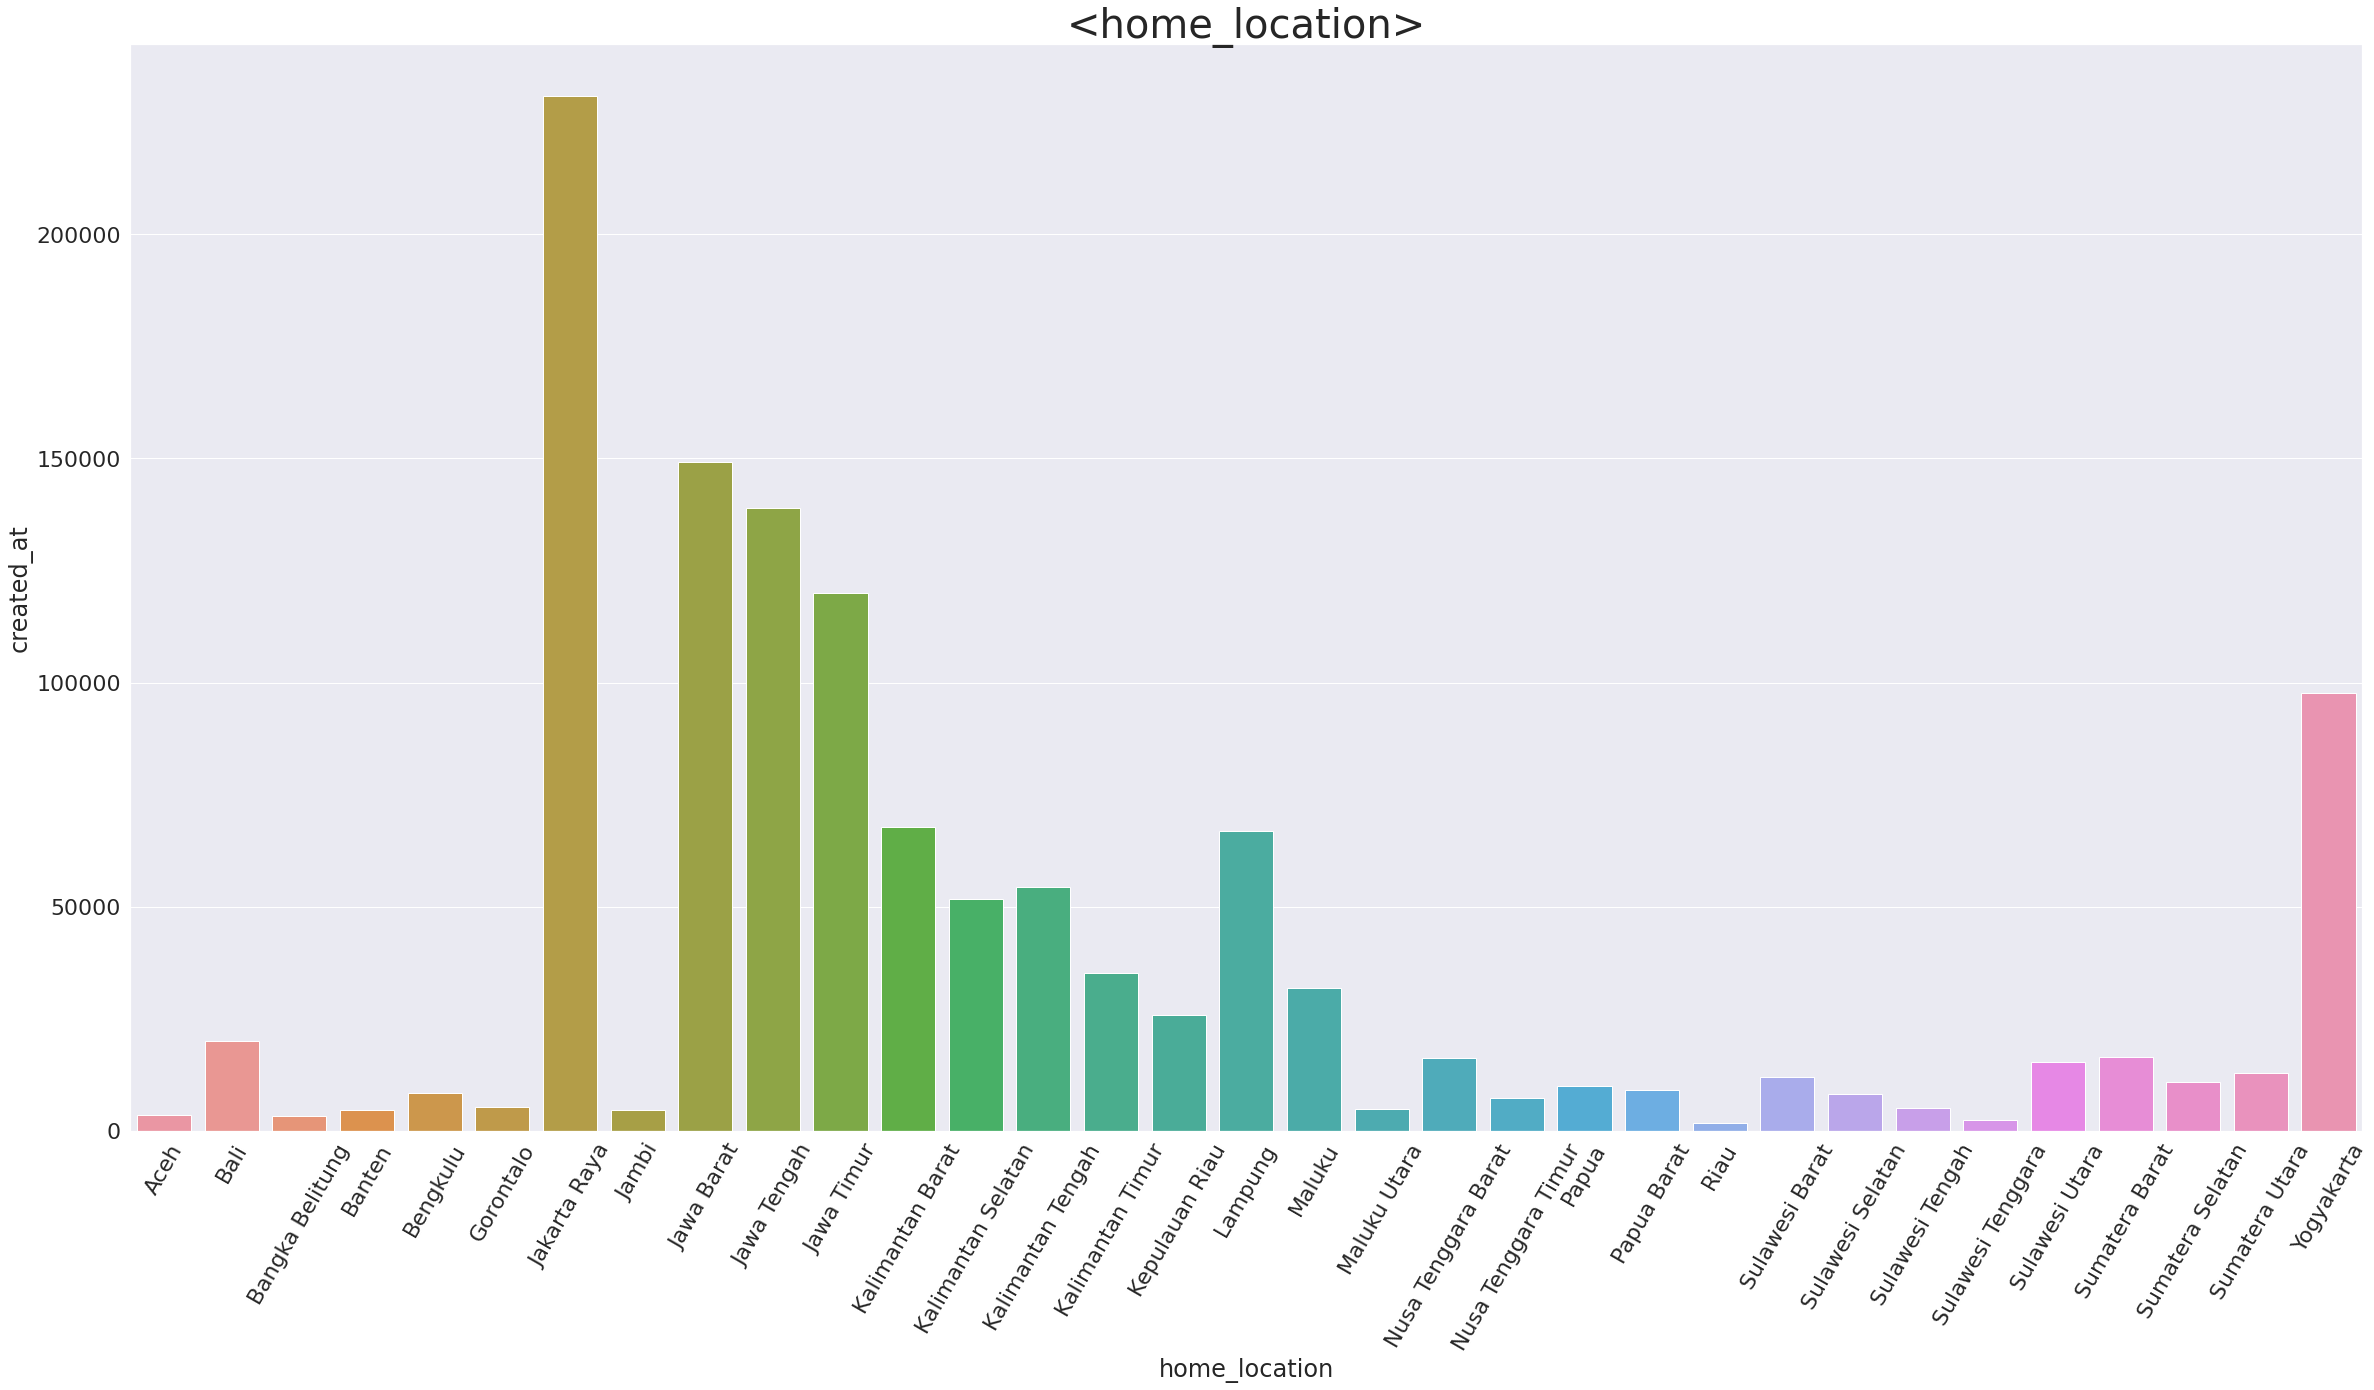

In [ ]:
sns.set(font_scale = 2)
plt.figure(figsize=(40,20))
sns.barplot(data=a, y='created_at',x=a.index)
plt.title('<home_location>',size=40)
plt.xticks(rotation=60)

- gender_x 성별 

In [ ]:
df['gender_x'].value_counts()

F    800114
M    454471
Name: gender_x, dtype: int64

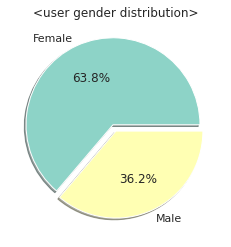

In [ ]:
sns.set(font_scale = 1)
sns.set_palette('Set3')
plt.pie(df['gender_x'].value_counts(),labels=['Female','Male'],autopct='%.1f%%',
        explode=[0.08,0],shadow=True)
plt.title('<user gender distribution>')
plt.show()